In [2]:
"""
Objective:
		 CIFAR10 image classification with deep-learning CNN
"""


'\nObjective:\n\t\t CIFAR10 image classification with deep-learning CNN\n'

In [1]:
# 1.0 Reset memory
% reset -f

In [2]:
import numpy as np
import os, time
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.utils import np_utils

/home/ashok/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
# 1.3.1 Import layers that will be used in modeling
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [7]:
X_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [8]:
# 4. There are 50000 training examples in CIFAR-10
num_train, height, width, depth = X_train.shape
num_train, height, width, depth
# 4.1 There are 10000 test examples in CIFAR-10
num_test = X_test.shape[0]
num_test

10000

In [9]:
# 4.2 There are 10 image classes
num_classes = np.unique(y_train).shape[0]
num_classes

10

In [10]:
# 4.2.1 Class names are in alphabetical sequence
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

[9]
truck


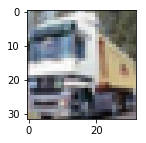

In [12]:
# 5. See an image
i = 1
im1 = X_train[i]    # Get an image array
# 5.1 To which class does it belong
print(y_train[i])
k = class_names[y_train[i][0]]           # Result of y_train[1] is [9], an array.

print(k)
# 5.2 Plot the image
fig = plt.figure(figsize=(4,2))
plt.imshow(im1)                         # imshow() is a matplotlib method
plt.show()

In [11]:
# 5. Change array types and normalise
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= np.max(X_train)              # Normalise data to [0, 1] range
X_test /= np.max(X_test)                # Normalise data to [0, 1] range
X_train.shape


(50000, 32, 32, 3)

In [12]:
# 6. One-hot encode the labels
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_train[:5, :]
y_train[:5]
Y_test = np_utils.to_categorical(y_test, num_classes)


In [24]:
##                             B. Define needed constants

# 2.0 Set some hyperparameters

# 2.1
batch_size = 32   # in each iteration, we consider 32 training examples at once
# 2.1
num_epochs = 5    # we iterate 5 times over the entire training set
# 2.3
kernel_size = 3   # we will use 3x3 kernels throughout
# 2.4
pool_size = 2     # we will use 2x2 pooling throughout
# 2.5
conv_depth_1 = 32 # we will initially have 32 filters per conv. layer...
                  # Remember each filter filters out some structure from image data
# 2.6
conv_depth_2 = 64 # ...switching to 64 filters  the first pooling layer
# 2.7
drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
# 2.8
drop_prob_2 = 0.5  # dropout in the FC layer with probability 0.5
# 2.9
hidden_size = 512  # the FC layer will have 512 neurons


# Model Building - Option 1

In [25]:
model = Sequential()
model.add(Convolution2D(conv_depth_1,                            # 32 filters
                       (kernel_size, kernel_size),               # 3 X 3
                       padding='same',
                       activation='relu',
                       input_shape=(height, width, depth)        # 32 X 32 X 3
                       )
           )


In [26]:
model.add(Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu'))

In [27]:
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))         # 2 X 2
        

In [28]:
model.add(Dropout(drop_prob_1 )) # 0.25

In [29]:
# 7.2 Now flatten to 1D, apply FC -> ReLU (with dropout) -> softmax
#     Fully connected layer
#    https://keras.io/layers/core/#flatten
model.add(Flatten())

In [30]:
"""
Dense implements the operation:
   output = activation(dot(input, kernel) + bias)
   where activation is the element-wise activation function
   passed as the activation argument, kernel is a weights matrix
   created by the layer, and bias is a bias vector created by the
   layer (only applicable if use_bias is True).
   Size of output has to be specified
"""
model.add(Dense(hidden_size, activation='relu'))   # output size = hidden_size

In [31]:
model.add(Dropout(drop_prob_2 )) # 0.2

In [32]:
# 7.2.2 Final output layer; softmax
#       About softmax: https://en.wikipedia.org/wiki/Softmax_function
#       exp(xi)/Sigma(exp(xk))
model.add( Dense(num_classes, activation='softmax'))

In [33]:
model.compile(loss='categorical_crossentropy',            # using the cross-entropy loss function
              optimizer='adam',                           # using the Adam optimiser
              metrics=['accuracy'])                       # reporting the accuracy

In [34]:
start = time.time()
history = model.fit(X_train[:20000], Y_train[:20000],         # Train the model using the training set...
                    batch_size=batch_size, epochs=num_epochs,
                    verbose=1, validation_split=0.1)
end = time.time()

print ((end - start)/60)

Train on 18000 samples, validate on 2000 samples
Epoch 1/5
18000/18000 [==============================] - 184s 10ms/step - loss: 1.9437 - acc: 0.2791 - val_loss: 1.6073 - val_acc: 0.3895
Epoch 2/5
18000/18000 [==============================] - 203s 11ms/step - loss: 1.6448 - acc: 0.3907 - val_loss: 1.4554 - val_acc: 0.4695
Epoch 3/5
18000/18000 [==============================] - 206s 11ms/step - loss: 1.5285 - acc: 0.4395 - val_loss: 1.3472 - val_acc: 0.5105
Epoch 4/5
18000/18000 [==============================] - 202s 11ms/step - loss: 1.4216 - acc: 0.4779 - val_loss: 1.2895 - val_acc: 0.5355
Epoch 5/5
18000/18000 [==============================] - 191s 11ms/step - loss: 1.3510 - acc: 0.5050 - val_loss: 1.2192 - val_acc: 0.5660
16.42730631828308


In [35]:
history.epoch,history.params

([0, 1, 2, 3, 4],
 {'batch_size': 32,
  'do_validation': True,
  'epochs': 5,
  'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
  'samples': 18000,
  'steps': None,
  'verbose': 1})

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
__________

No handles with labels found to put in legend.


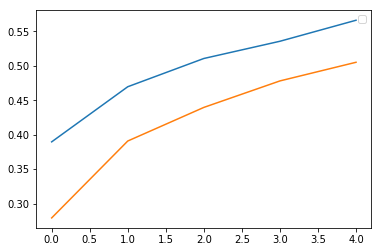

In [39]:
# 8.4 How accuracy changes as epochs increase
val_acc = history.history['val_acc']
tr_acc=history.history['acc']
plt.plot(val_acc,label='val_acc')
plt.plot(tr_acc, label="Tra_acc")
plt.legend()
plt.show()

In [45]:
# 9. Evaluate the trained model on the test set!
model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 49s 5ms/step


[14.506285668945312, 0.1]

# 2 Model Building - Option 2

In [67]:
##                             B. Define needed constants

# 2.0 Set some hyperparameters

# 2.1
batch_size = 32   # in each iteration, we consider 32 training examples at once
# 2.1
num_epochs = 3    # we iterate 5 times over the entire training set
# 2.3
kernel_size = 3   # we will use 3x3 kernels throughout
# 2.4
pool_size = 2     # we will use 2x2 pooling throughout
# 2.5
conv_depth_1 = 32 # we will initially have 32 filters per conv. layer...
                  # Remember each filter filters out some structure from image data
# 2.6
conv_depth_2 = 64 # ...switching to 64 filters  the first pooling layer
# 2.7
drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
# 2.8
drop_prob_2 = 0.5  # dropout in the FC layer with probability 0.5
# 2.9
hidden_size = 256  # the FC layer will have 512 neurons

In [69]:
model1 = Sequential()
model1.add(Convolution2D(conv_depth_1, (kernel_size, kernel_size),
                        padding='same',
                        input_shape=(height, width, depth)
                       )
         )          
model1.add(Activation('relu'))
model1.add(Convolution2D(conv_depth_2, (kernel_size, kernel_size),
                        padding='same',
                        input_shape=(height, width, depth)
                       )
         )
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [70]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_33 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_34 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 16384)             0         
__________

In [71]:
start = time.time()
history = model1.fit(X_train[:20000], Y_train[:20000],         # Train the model using the training set...
                    batch_size=batch_size, epochs=num_epochs,
                    verbose=1, validation_split=0.1)
end = time.time()

print ((end - start)/60)

Train on 18000 samples, validate on 2000 samples
Epoch 1/3
18000/18000 [==============================] - 383s 21ms/step - loss: 1.6522 - acc: 0.4004 - val_loss: 1.3738 - val_acc: 0.5030
Epoch 2/3
18000/18000 [==============================] - 450s 25ms/step - loss: 1.2898 - acc: 0.5341 - val_loss: 1.2334 - val_acc: 0.5655
Epoch 3/3
18000/18000 [==============================] - 446s 25ms/step - loss: 1.0982 - acc: 0.6062 - val_loss: 1.0934 - val_acc: 0.6160
21.334429248174033


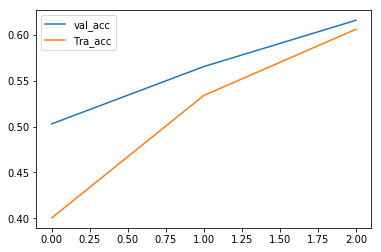

In [72]:
# 8.4 How accuracy changes as epochs increase
val_acc = history.history['val_acc']
tr_acc=history.history['acc']
plt.plot(val_acc,label='val_acc')
plt.plot(tr_acc, label="Tra_acc")
plt.legend()
plt.show()

In [46]:
# 9. Evaluate the trained model on the test set!
model1.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 44s 4ms/step


[14.506285668945312, 0.1]

# 3 Model Building - Option 3

In [51]:
##                             B. Define needed constants

# 2.0 Set some hyperparameters

# 2.1
batch_size = 32   # in each iteration, we consider 32 training examples at once
# 2.1
num_epochs = 10    # we iterate 5 times over the entire training set
# 2.3
kernel_size = 3   # we will use 3x3 kernels throughout
# 2.4
pool_size = 2     # we will use 2x2 pooling throughout
# 2.5
conv_depth_1 = 32 # we will initially have 32 filters per conv. layer...
                  # Remember each filter filters out some structure from image data
# 2.6
conv_depth_2 = 64 # ...switching to 64 filters  the first pooling layer
# 2.7
drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
# 2.8
drop_prob_2 = 0.5  # dropout in the FC layer with probability 0.5
# 2.9
hidden_size = 256  # the FC layer will have 512 neurons

In [52]:
model2 = Sequential()
model2.add(Convolution2D(conv_depth_1, (kernel_size, kernel_size),
                        padding='same',
                        input_shape=(height, width, depth)
                       )
         )          
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model2.add(Convolution2D(conv_depth_2, (kernel_size, kernel_size),
                        padding='same',
                        input_shape=(height, width, depth)
                       )
         )
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(256))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_14 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 8, 8, 64)          0         
__________

In [54]:
start = time.time()
history = model2.fit(X_train[:20000], Y_train[:20000],         # Train the model using the training set...
                    batch_size=batch_size, epochs=num_epochs,
                    verbose=1, validation_split=0.1)
end = time.time()

print ((end - start)/60)

Train on 18000 samples, validate on 2000 samples
Epoch 1/10
18000/18000 [==============================] - 98s 5ms/step - loss: 1.9078 - acc: 0.2989 - val_loss: 1.6562 - val_acc: 0.4080
Epoch 2/10
18000/18000 [==============================] - 91s 5ms/step - loss: 1.5970 - acc: 0.4171 - val_loss: 1.4143 - val_acc: 0.4870
Epoch 3/10
18000/18000 [==============================] - 101s 6ms/step - loss: 1.5004 - acc: 0.4541 - val_loss: 1.3868 - val_acc: 0.5025
Epoch 4/10
18000/18000 [==============================] - 96s 5ms/step - loss: 1.3970 - acc: 0.4897 - val_loss: 1.2610 - val_acc: 0.5490
Epoch 5/10
18000/18000 [==============================] - 97s 5ms/step - loss: 1.3321 - acc: 0.5183 - val_loss: 1.2045 - val_acc: 0.5820
Epoch 6/10
18000/18000 [==============================] - 91s 5ms/step - loss: 1.2768 - acc: 0.5447 - val_loss: 1.1738 - val_acc: 0.5915
Epoch 7/10
18000/18000 [==============================] - 103s 6ms/step - loss: 1.2245 - acc: 0.5569 - val_loss: 1.1034 - val_ac

No handles with labels found to put in legend.


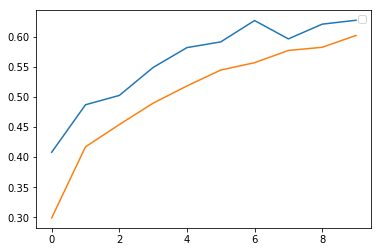

In [55]:
# 8.4 How accuracy changes as epochs increase
val_acc = history.history['val_acc']
tr_acc=history.history['acc']
plt.plot(val_acc,label='val_acc')
plt.plot(tr_acc, label="Tra_acc")
plt.legend()
plt.show()

In [65]:
# 9. Evaluate the trained model on the test set!
model2.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 26s 3ms/step


[2.3085036407470705, 0.0955]

# 4 Model Building - Option 4

In [60]:
##                             B. Define needed constants

# 2.0 Set some hyperparameters

# 2.1
batch_size = 32   # in each iteration, we consider 32 training examples at once
# 2.1
num_epochs = 10    # we iterate 5 times over the entire training set
# 2.3
kernel_size = 4   # we will use 4x4 kernels throughout
# 2.4
pool_size = 3    # we will use 2x2 pooling throughout
# 2.5
conv_depth_1 = 32 # we will initially have 32 filters per conv. layer...
                  # Remember each filter filters out some structure from image data
# 2.6
conv_depth_2 = 64 # ...switching to 64 filters  the first pooling layer
# 2.7
drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
# 2.8
drop_prob_2 = 0.5  # dropout in the FC layer with probability 0.5
# 2.9
hidden_size = 256  # the FC layer will have 512 neurons

In [61]:
model3 = Sequential()
model3.add(Convolution2D(conv_depth_1, (kernel_size, kernel_size),
                        padding='same',
                        input_shape=(height, width, depth)
                       )
         )          
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model3.add(Convolution2D(conv_depth_2, (kernel_size, kernel_size),
                        padding='same',
                        input_shape=(height, width, depth)
                       )
         )
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(256))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        1568      
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 64)        32832     
_________________________________________________________________
activation_26 (Activation)   (None, 10, 10, 64)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 3, 3, 64)          0         
__________

In [63]:
start = time.time()
history = model3.fit(X_train[:20000], Y_train[:20000],         # Train the model using the training set...
                    batch_size=batch_size, epochs=num_epochs,
                    verbose=1, validation_split=0.1)
end = time.time()

print ((end - start)/60)

Train on 18000 samples, validate on 2000 samples
Epoch 1/10
18000/18000 [==============================] - 90s 5ms/step - loss: 1.8432 - acc: 0.3141 - val_loss: 1.5042 - val_acc: 0.4545
Epoch 2/10
18000/18000 [==============================] - 87s 5ms/step - loss: 1.5164 - acc: 0.4466 - val_loss: 1.3491 - val_acc: 0.5020
Epoch 3/10
18000/18000 [==============================] - 87s 5ms/step - loss: 1.3852 - acc: 0.5005 - val_loss: 1.3077 - val_acc: 0.5280
Epoch 4/10
18000/18000 [==============================] - 100s 6ms/step - loss: 1.2912 - acc: 0.5383 - val_loss: 1.2005 - val_acc: 0.5790
Epoch 5/10
18000/18000 [==============================] - 100s 6ms/step - loss: 1.2171 - acc: 0.5645 - val_loss: 1.1577 - val_acc: 0.5985
Epoch 6/10
18000/18000 [==============================] - 93s 5ms/step - loss: 1.1549 - acc: 0.5913 - val_loss: 1.1038 - val_acc: 0.6155
Epoch 7/10
18000/18000 [==============================] - 97s 5ms/step - loss: 1.1051 - acc: 0.6087 - val_loss: 1.0853 - val_ac

No handles with labels found to put in legend.


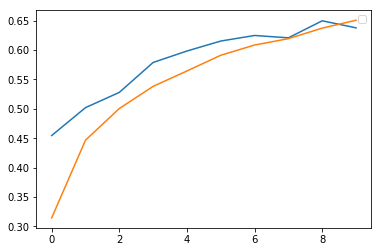

In [64]:
# 8.4 How accuracy changes as epochs increase
val_acc = history.history['val_acc']
tr_acc=history.history['acc']
plt.plot(val_acc,label='val_acc')
plt.plot(tr_acc, label="Tra_acc")
plt.legend()
plt.show()

In [66]:
# 9. Evaluate the trained model on the test set!
model3.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 15s 2ms/step


[1.0091965453147889, 0.6459]